In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from dash import Dash, html, dcc, Input, Output

In [48]:
# Extracting dataset source
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

In [49]:
# loading dataset
auto_df = pd.read_csv(url)

In [164]:
auto_df.unemployment_rate.unique()


array([5.4, 4.8, 3.4, 4.2, 5.3, 2.9, 3. , 5.2, 4.4, 2.6, 3.3, 5.9, 5.8,
       2.8, 4.1, 4.3, 5.6, 3.7, 3.1, 4.7, 5. , 3.2, 4. , 3.8, 4.6, 3.6,
       4.9, 5.5, 4.5, 5.7, 6. , 3.5, 2.4, 1.5, 2. , 2.3, 1.7, 1.1, 1.3,
       1.2, 1.4, 2.1, 2.2, 2.5, 1. , 1.9, 2.7, 1.8, 1.6])

In [51]:
# dataset characteristics
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [52]:
# checking any null values
auto_df.isnull().sum()

Date                       0
Year                       0
Month                      0
Recession                  0
Consumer_Confidence        0
Seasonality_Weight         0
Price                      0
Advertising_Expenditure    0
Competition                0
GDP                        0
Growth_Rate                0
unemployment_rate          0
Automobile_Sales           0
Vehicle_Type               0
City                       0
dtype: int64

In [53]:
# Grouping automobile sales data by year
auto_sales = (auto_df.groupby(['Year'])['Automobile_Sales'].sum())

Text(0, 0.5, 'Vehicle Sales')

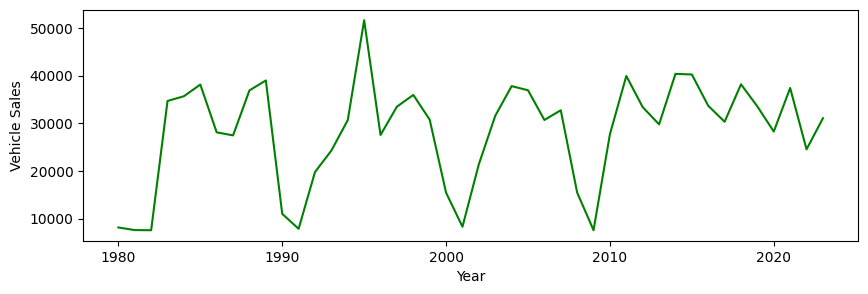

In [54]:
# Fluctuations in automobile sales between (1980~2023)
fig = plt.figure(figsize = (10,3))
auto_sales.plot(c = "green")
plt.xlabel("Year")D
plt.ylabel("Vehicle Sales")

In [55]:
auto_types = auto_df['Vehicle_Type'].unique().tolist()

Text(0.5, 1.0, 'Vehicle Sales Per Fiscal Year')

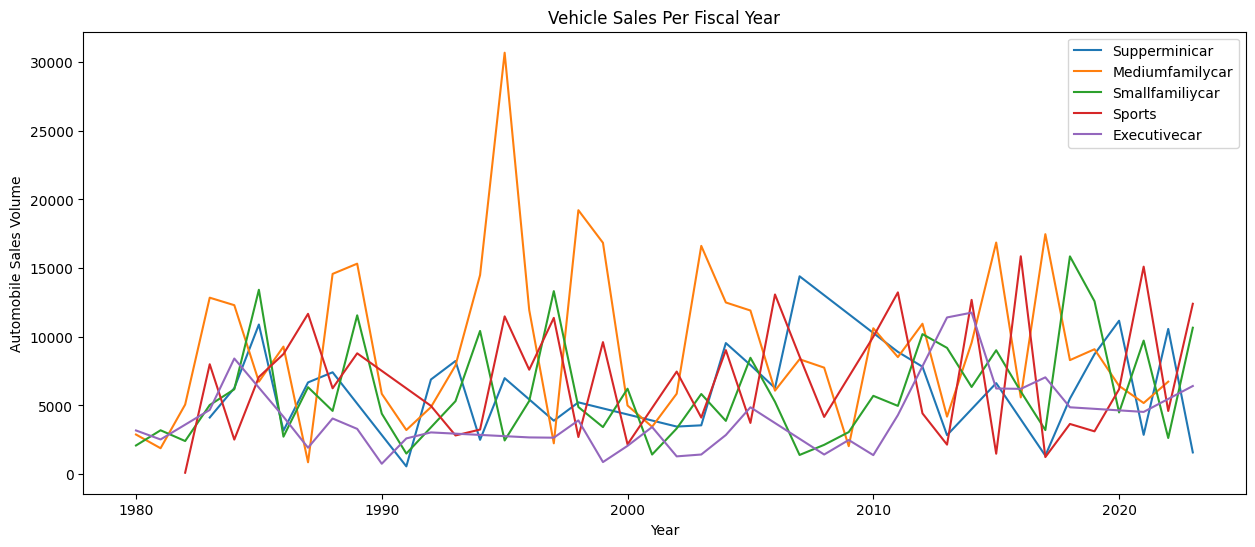

In [56]:
fig = plt.figure(figsize = (15,6))
sales_per_model = auto_df.groupby(['Year','Vehicle_Type'],as_index = False)['Automobile_Sales'].sum() 
sales_per_model.set_index('Year',inplace = True)
sales_per_model = sales_per_model.groupby(['Vehicle_Type'])['Automobile_Sales']
sales_per_model.plot()
plt.legend(auto_types)
plt.xlabel('Year')
plt.ylabel('Automobile Sales Volume')
plt.title('Vehicle Sales Per Fiscal Year')

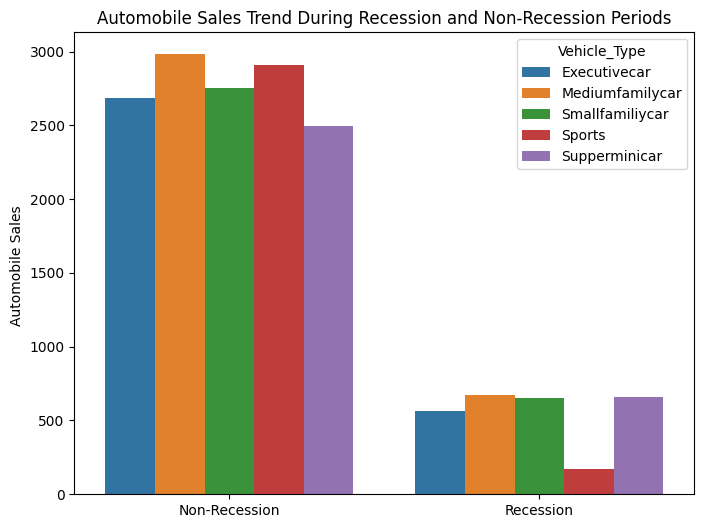

In [57]:
rec_sales = auto_df.groupby(['Recession','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
fig = plt.figure(figsize = (8,6))
sns.barplot(x = 'Recession', y = 'Automobile_Sales',hue = 'Vehicle_Type',data = rec_sales)
plt.xlabel('')
plt.ylabel('Automobile Sales ')
plt.title('Automobile Sales Trend During Recession and Non-Recession Periods')
plt.xticks(ticks = [0,1],labels = ['Non-Recession','Recession'])
rec_sales = rec_sales.groupby(['Vehicle_Type'])['Automobile_Sales']

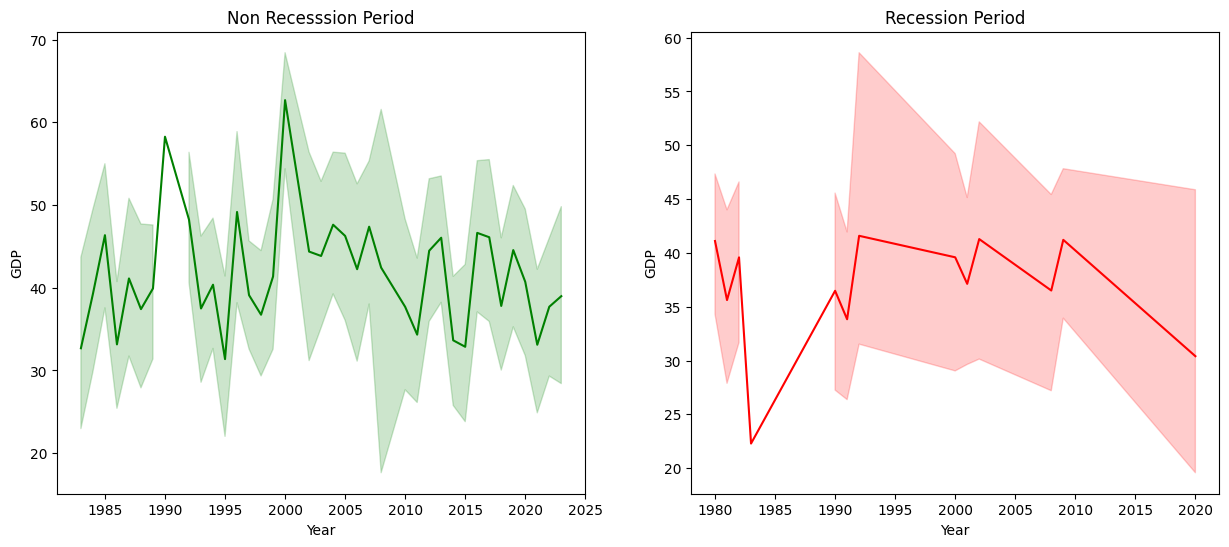

In [59]:
fig = plt.figure(figsize = (15,6))
period = ['Non Recesssion Period','Recession Period']
color = ['green','red']
for index,period in enumerate(period):
    ax = plt.subplot(1,2,index+1)
    data = auto_df[auto_df['Recession'] == index]    
    sns.lineplot(x = 'Year', y = 'GDP', data = data,color = color[index])
    plt.title(period)

Text(0.5, 1.0, 'Seasonality Impact On Automobile Sales')

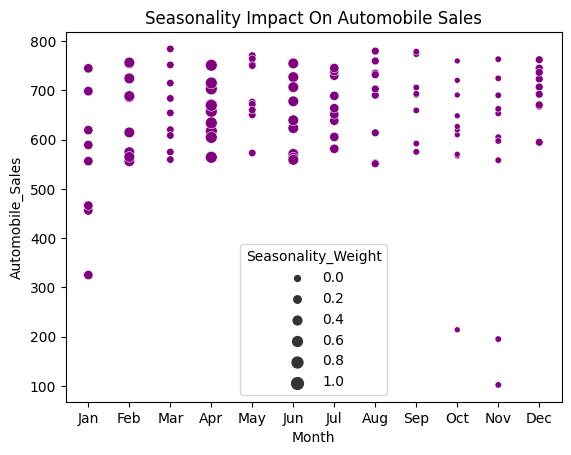

In [60]:
rec_data = auto_df[auto_df['Recession'] == 1]
non_rec_data = auto_df[auto_df['Recession'] == 0]
sns.scatterplot(x = 'Month',y = 'Automobile_Sales',data = rec_data, size = rec_data['Seasonality_Weight'],color = 'purple')
plt.title("Seasonality Impact On Automobile Sales")

Text(0.5, 1.0, 'Auto Sales Volume Trend Per Average Price')

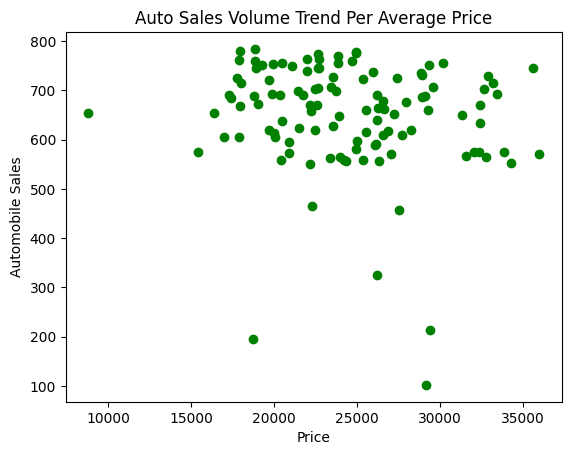

In [61]:
plt.scatter(rec_data['Price'],rec_data['Automobile_Sales'],c = 'green')
plt.xlabel("Price")
plt.ylabel("Automobile Sales")
plt.title("Auto Sales Volume Trend Per Average Price")

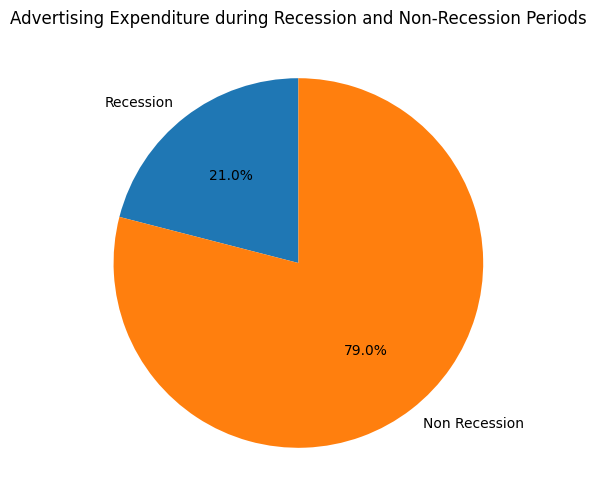

In [62]:
rec_total = rec_data['Advertising_Expenditure'].sum()
non_rec_total = non_rec_data['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = ['Recession','Non Recession']
sizes = [rec_total, non_rec_total]
plt.pie(sizes, labels= labels,autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

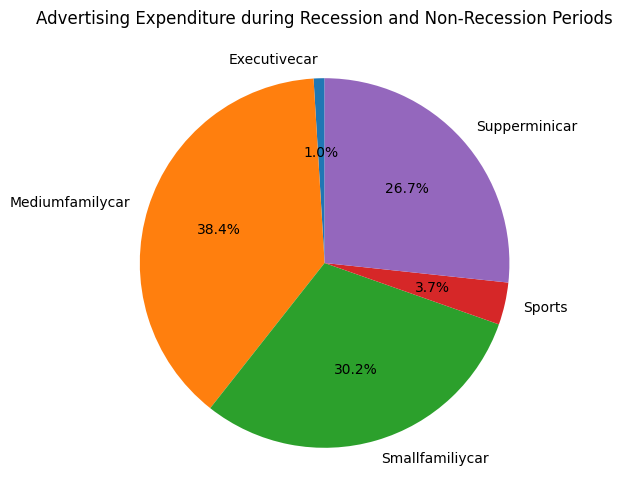

In [63]:
rec_total_vt = rec_data.groupby(['Vehicle_Type'])['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))
labels = rec_total_vt.index
sizes = rec_total_vt.values
plt.pie(sizes, labels= labels,autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

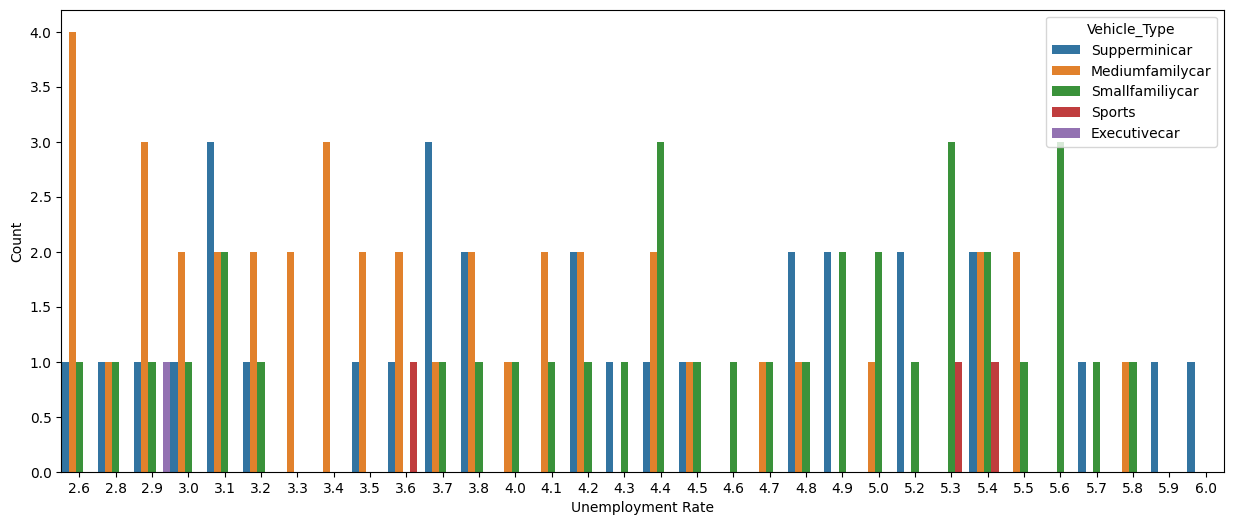

In [64]:
fig = plt.figure(figsize = (15,6))
sns.countplot(x = 'unemployment_rate',data = rec_data,hue ='Vehicle_Type',width=1)
plt.ylabel('Count')
plt.xlabel('Unemployment Rate')
plt.show()

In [287]:
year_list = [year for year in range(1980,2024)]

In [303]:
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Automobile Portfolio Report",style = {'font-size':'30px', 'font-family':'Arial'}),
    dcc.Dropdown(id = 'dropdown-statistics',
                 placeholder = 'Select report type',
                 options = [{'label':'Yearly Statistics Report','value':'Yearly Statistics'},
                            {'label':'Recession Period Report','value':'Recession Period'}]
                ),
    dcc.Dropdown(id = 'dropdown-year',
                 placeholder = 'Select year',
                 options = [{'label':i,'value':i} for i in year_list]
                ),
    html.Div([
    html.Div(id='output-container', className='chart-grid')
    ])
])

In [304]:
@app.callback(
    Output(component_id='dropdown-year', component_property='disabled'),
    Input(component_id='dropdown-statistics',component_property='value'))

def update_input_container(select_report):
    if select_report == 'Yearly Statistics':
        return False
    else:
        return True

    
@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
    Input(component_id='dropdown-year', component_property='value')])

def update_output_container(report_type,select_year):
    if report_type == 'Recession Period':
        
        # Automobile sales during recession period line-plot
        rec_sales = rec_data.groupby(['Year'])['Automobile_Sales'].sum().reset_index()
        rec_chart1 = dcc.Graph(
        figure = px.line(rec_sales,
        x = 'Year',
        y ='Automobile_Sales',
        title = 'Automobile sales during recession')
        )
        
        # Average sales per vehicle type bar-plot
        rec_vt = rec_data.groupby('Vehicle_Type')['Automobile_Sales'].mean().reset_index()
        rec_chart2 = dcc.Graph(
            figure = px.bar(rec_vt,
                           x = 'Vehicle_Type',
                           y = 'Automobile_Sales',
                           title = 'Comparing average sales across vehicle types')
        )
        
        # Total advertising expenditure shared by each vehicle type in recession pie-chart
        rec_adv = rec_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        rec_chart3 = dcc.Graph(
        figure = px.pie(rec_adv,
                       values='Advertising_Expenditure',
                       names='Vehicle_Type',
                       title = 'Total advertising expenditure shared by each vehicle type in recession',
                       )
        )
        
        # Effect of unemployment rate on vehicle type and sales bar-plot
        rec_chart4 = dcc.Graph(
            figure = px.bar(rec_data,
                            x='unemployment_rate',
                            color='Vehicle_Type',
                            barmode='group',
                            orientation='v',
                            title = 'Effect of unemployment rate on vehicle type and sales',
                            labels = {'unemployment_rate':'Unemployment Rate','Vehicle_Type':'Vehicles Type','index':'Vehicles Sold'}
                           )
        )
        
        return [html.Div(className = 'chart-item', children = [html.Div(rec_chart1),html.Div(rec_chart2)]),
               html.Div(className = 'chart-item', children = [html.Div(rec_chart3),html.Div(rec_chart4)])]
    else:
        yearly_data = auto_df[auto_df['Year'] == select_year]
        
        # Automobiles sold each year
        year_sales = auto_df.groupby('Year')['Automobile_Sales'].mean().reset_index()
        chart1 = dcc.Graph(
            figure = px.line(year_sales,
                            x = 'Year',
                            y = 'Automobile_Sales',
                            labels = {'Automobile_Sales':'Vehicles Sold'},
                            title = 'Automobiles sales per year')
        )
        
        # Total Monthly Automobile sales using line chart.
        month_sales = yearly_data.groupby('Month')['Automobile_Sales'].mean().reset_index()
        chart2 = dcc.Graph(
            figure = px.line(month_sales,
                            x = 'Month',
                            y = 'Automobile_Sales',
                            labels = {'Automobile_Sales':'Vehicles Sold'},
                            title = 'Automobiles sales per month')
        )
        
        # Plot bar chart for average number of vehicles sold during the given year
        vehicle_avg = yearly_data.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
        chart3 = dcc.Graph(
            figure = px.bar(vehicle_avg,
                            x = 'Year',
                            y = 'Automobile_Sales',
                            color = 'Vehicle_Type',
                            barmode='group',
                            labels = {'Automobile_Sales':'Vehicles Sold','Vehicle_Type':'Vehicle Type'},
                            title = 'Automobiles sales per month')
        )
        
        # Total advertising expenditure shared by each vehicle type in recession pie-chart
        auto_adv = yearly_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        chart4 = dcc.Graph(
        figure = px.pie(auto_adv,
                       values='Advertising_Expenditure',
                       names='Vehicle_Type',
                       title = 'Total advertising expenditure shared by each vehicle type in {}'.format(select_year),
                       )
        )
        
        return [html.Div(className = 'chart-item', children = [html.Div(chart1),html.Div(chart2)]),
                html.Div(className = 'chart-item', children = [html.Div(chart3),html.Div(chart4)])
               ]

In [305]:
if __name__ == '__main__':
    app.run_server()